In [1]:
import matplotlib.pyplot as plt
import pandas as pd             
import numpy as np
import statsmodels.formula.api as smf  
import statsmodels as sm  
import sklearn.linear_model as sk
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import metrics
import seaborn as sns

In [72]:
dat= pd.read_csv('project1.csv')

dat= dat.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita'})
dat= dat.rename(columns={' gdp_for_year ($) ': 'gdp_per_year'})

countries= pd.unique(dat.country)
print(countries,'\n')

gen= pd.unique(dat.generation)
print(gen,'\n')

age= pd.unique(dat.age)
print(age,'\n')

gdp_capita= dat.gdp_per_capita
gdp_year= dat.gdp_per_year

column_names = dat.columns
print(column_names, '\n')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

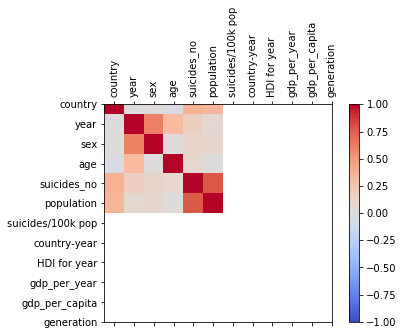

In [3]:
corr = dat.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dat.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dat.columns)
ax.set_yticklabels(dat.columns)
plt.show()

In [4]:
country_count= dat.groupby('country').size()
print(country_count.sort_values())

dat.drop(dat[dat['country'] == 'Mongolia'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Cabo Verde'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Dominica'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Macau'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Bosnia and Herzegovina'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Saint Kitts and Nevis'].index, inplace = True)
dat.drop(dat[dat['country'] == 'San Marino'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Oman'].index, inplace = True)
dat.drop(dat[dat['country'] == 'United Arab Emirates'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Nicaragua'].index, inplace = True)
dat.drop(dat[dat['country'] == 'Turkey'].index, inplace = True)

country_count= dat.groupby('country').size()
print(country_count.sort_values())

dat= dat[dat['suicides_no'] > 0]

country
Mongolia                   10
Dominica                   12
Macau                      12
Cabo Verde                 12
Bosnia and Herzegovina     24
Oman                       36
Saint Kitts and Nevis      36
San Marino                 36
United Arab Emirates       72
Nicaragua                  72
Turkey                     84
Montenegro                120
Maldives                  120
Fiji                      132
Sri Lanka                 132
Kiribati                  132
Aruba                     168
Qatar                     178
Cyprus                    178
Philippines               180
Azerbaijan                192
Jamaica                   204
Seychelles                216
Serbia                    216
South Africa              240
Belarus                   252
Bahrain                   252
Slovenia                  252
Estonia                   252
Switzerland               252
                         ... 
Costa Rica                360
Australia                 360
Ir

    year  suicide_count
0   1985         116063
1   1986         120670
2   1987         126842
3   1988         121026
4   1989         160244
5   1990         193361
6   1991         198020
7   1992         211473
8   1993         221565
9   1994         232036
10  1995         243544
11  1996         246725
12  1997         240745
13  1998         249591
14  1999         256117
15  2000         255831
16  2001         250652
17  2002         256095
18  2003         256079
19  2004         240861
20  2005         234278
21  2006         233271
22  2007         233307
23  2008         235347
24  2009         242300
25  2010         236703
26  2011         234920
27  2012         228394
28  2013         221038
29  2014         220736
30  2015         201793
31  2016          15180


Text(0, 0.5, 'Suicide Count')

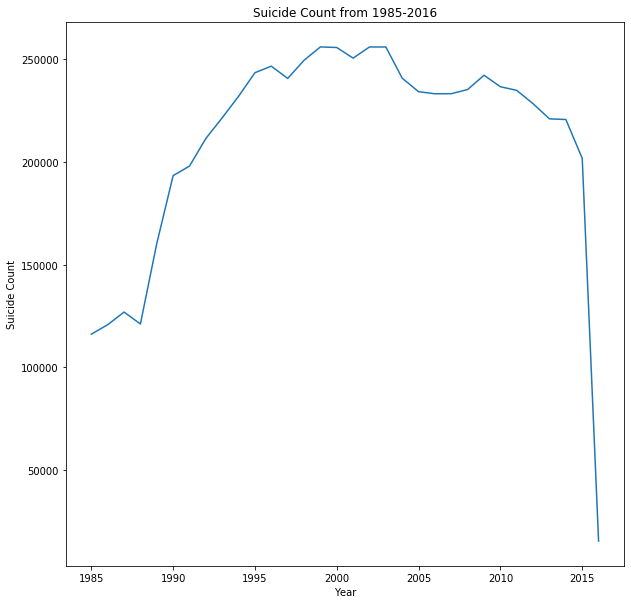

In [18]:
suicide_per_year= pd.DataFrame({'suicide_count' : dat.groupby(["year"])["suicides_no"].sum()}).reset_index()
print(suicide_per_year)
fig, ax= plt.subplots(figsize=(10,10))
ax.plot(suicide_per_year.year, suicide_per_year.suicide_count)
ax.set_title("Suicide Count from 1985-2016")
ax.set_xlabel("Year")
ax.set_ylabel("Suicide Count") 


        generation  suicide_count
0          Boomers        2282325
1  G.I. Generation         510004
2     Generation X        1528144
3     Generation Z          15530
4       Millenials         618181
5           Silent        1780623


Text(0, 0.5, 'Suicide count')

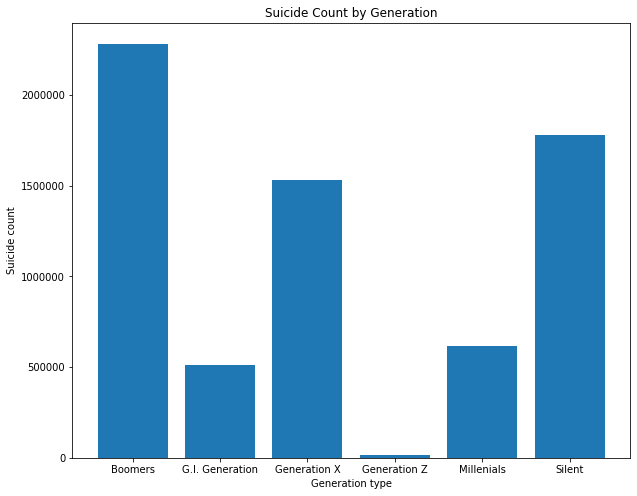

In [21]:
suicide_gen= pd.DataFrame({'suicide_count' : dat.groupby(["generation"])["suicides_no"].sum()}).reset_index()
print(suicide_gen)

fig, ax= plt.subplots(figsize=(10,8))
ax.bar(suicide_gen.generation, suicide_gen.suicide_count)
ax.set_title("Suicide Count by Generation")
ax.set_xlabel("Generation type")
ax.set_ylabel("Suicide count") 


           age  suicide_count
0  15-24 years         805429
1  25-34 years        1120834
2  35-54 years        2447832
3   5-14 years          51888
4  55-74 years        1656374
5    75+ years         652450


Text(0, 0.5, 'Suicide count')

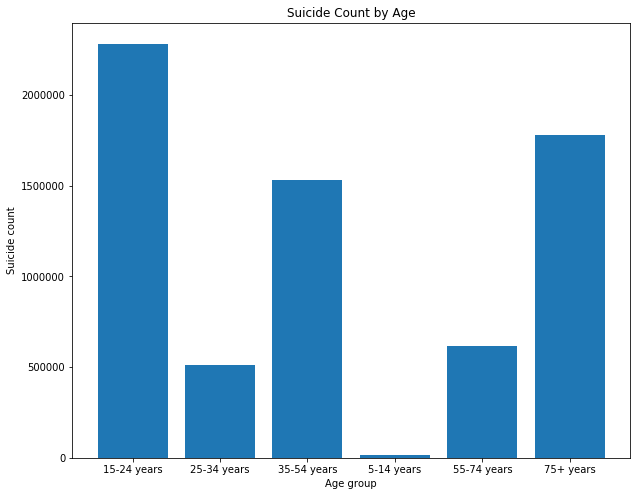

In [22]:
suicide_age= pd.DataFrame({'suicide_count' : dat.groupby(["age"])["suicides_no"].sum()}).reset_index()
print(suicide_age)

fig, ax= plt.subplots(figsize=(10,8))
ax.bar(suicide_age.age, suicide_gen.suicide_count)
ax.set_title("Suicide Count by Age")
ax.set_xlabel("Age group")
ax.set_ylabel("Suicide count") 

In [78]:
suicide_country= pd.DataFrame({'suicide_count' : dat.groupby(["country"])["suicides_no"].sum()}).reset_index()
suicide_country= suicide_country.sort_values(by= 'suicide_count')
#print(suicide_country)

#Top 10 countries: 
#Russian Federation, United States, Japan, France, Ukraine, Germany, Republic of Korea, Brazil, Poland, UK
usa= dat[dat['country']=='United States']
us_gdp= pd.DataFrame({'gdp_per_year': usa.groupby(["year"])["gdp_per_year"].mean()}).reset_index()
print(us_gdp)
# fig, ax= plt.subplots(figsize=(10,8))
# ax.bar(suicide_country.country, suicide_country.suicide_count)
# ax.set_title("Suicide Count by Age")
# ax.set_xlabel("Age group")
# ax.set_ylabel("Suicide count") 

                         country  suicide_count
27                      Dominica              0
76         Saint Kitts and Nevis              0
79                    San Marino              4
1            Antigua and Barbuda             11
55                      Maldives             20
54                         Macau             27
65                          Oman             33
37                       Grenada             38
17                    Cabo Verde             42
48                      Kiribati             53
8                        Bahamas             93
81                    Seychelles             98
4                          Aruba            101
78  Saint Vincent and Grenadines            124
10                      Barbados            177
45                       Jamaica            184
77                   Saint Lucia            230
31                          Fiji            304
14        Bosnia and Herzegovina            318
13                        Belize        

DataError: No numeric types to aggregate

dtype('O')